Enterprise Analytics Knowledgebase  
Topic area: Data Visualisation  
Sub-topics: Univariate analysis and Bi-variate analysis  
   
Data visualisation can be performed in many ways. There are infinite ways to visualise the data, and what works is dependant on the patterns in the data. In this post, we are trying to categorise the visualisation of data and provide a starting point.
Every regression, classification and clustering problem has some or all of the following assumptions:  
1. Change in independent variables changes the dependant variable. In other words, there is a relationship between the dependant variable and the independent variables. Before building a model, it is advised to visualise this relationship.  
2. Assumptions on the distribution of the dependant or independent variable. For example, for Naive Bayes classifier, the independent variables should follow a normal distribution.  
3. Assumptions of relationships between independent variables. For example, for linear regression, the independent variables should not be correlated.  
4. Unbalanced dataset. The frequency of the smaller class should be significant when compared to the frequency of the larger class.  
5. The time series of data/features are stationary.  

Apart from validating the assumptions and identifying trends in the data, data visualisation can also be used for gathering insights and feature engineering.  
The below example is from the marketing department of a consulting firm. The problem is to identify the projects that they can win.

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
%matplotlib inline

In [2]:
# loading th data
path="Data/marketing dept.csv"
df = pd.read_csv(path)
df.head()

,reporting_status,product,industry,region,strength_in_segment,profit_for_customer,sales_value,profit_perc,joint_bid_portion
0,Lost,F,Cap,Oth,57,1.225,6.5,64,59
1,Lost,L,Def,UK,51,1.469,9.9,56,58
2,Lost,Lo,Cli,UK,79,0.887,7.0,59,48
3,Lost,G,Fin,UK,55,1.316,8.9,34,41
4,Won,G,Sec,UK,32,1.010,5.7,43,63


## Univariate analysis
The univariate analysis deals with EDA on one variable alone. In describing or characterising the observations of an individual variable, three basic properties are of interest:  
1. The location of observations, or how large or small the values of the individual observations are  
2. The dispersion (sometimes called scale or spread) of the observations  
3. The distribution of the observations  

Uni-variate plots provide one way to find out about those properties. There are two basic kinds of univariate plots:  
1. Enumeration plots, or plots that show every observation  
2. Summary plots that generalise the data into a simplified representation  
3. Enumerative plots  

### Index Plot/Univariate Scatter Diagram
The most common enumerative plot is the index plot. It displays the values of a single variable for each observation using symbols plotted relative to the observation number.

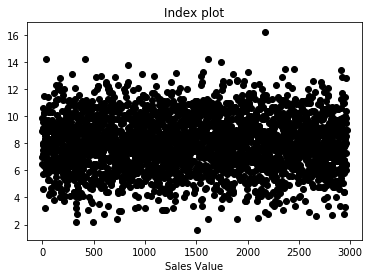

In [3]:
plt.plot(df.sales_value, 'o', color='black')
plt.title("Index plot")
plt.xlabel('Sales Value');

From the above plot, we can infer that there are around 3000 observations for sales, and they are captured randomly along the data.  

### Strip Plot/Strip Chart (univariate scatter diagram)
Displays the values of a single variable as symbols plotted along a line. This is a basic plot where we can see the spread of the data.

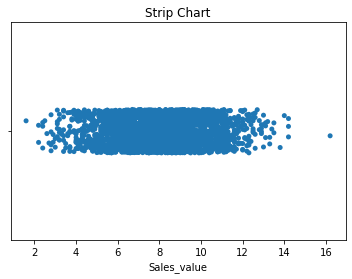

In [4]:
ax = sns.stripplot(x=df.sales_value)
ax.set(xlabel = 'Sales_value', title = 'Strip Chart');

### Dot Plot/Dot Chart
Dot plot displays the values plotted along a line. It is generally constructed after sorting the rows. This can help us in determining the distribution of the data. It can also help us identify the continuity of the data.

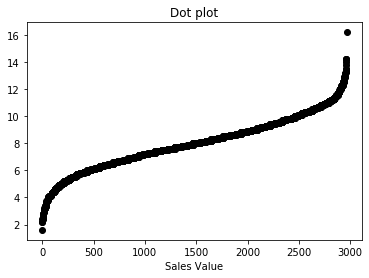

In [5]:
plt.plot(df.sort_values(by = 'sales_value').reset_index().sales_value, 'o', color='black')
plt.title("Dot plot")
plt.xlabel('Sales Value');

The cumulative distribution of a normal distribution is plotted for reference. 
![cdf](Pictures/normal_dist_cdf.png)

## Univariate Summary Plots
Summary plots display an object or a graph that gives a more concise expression of the location, dispersion, and distribution of a variable than an enumerative plot, but this comes at the expense of some loss of information: In a summary plot, it is no longer possible to retrieve the individual data value, but the gain usually matches this loss in understanding that results from the efficient representation of the data. Summary plots generally prove to be much better than the enumerative plots in revealing the distribution of the data.   
### Box plot
A simple way of representing statistical data on a plot in which a rectangle is drawn to represent the second and third quartiles, usually with a vertical line inside to indicate the median value. The lower and upper quartiles are shown as horizontal lines on either side of the rectangle.  

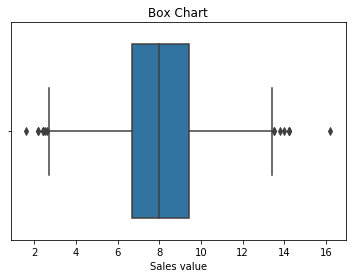

In [6]:
ax = sns.boxplot(x = df.sales_value)
ax.set(xlabel = 'Sales value', title = 'Box Chart');

### Histograms
The other summary plots are of various types:  

Histograms: Histograms are a type of bar chart that displays the counts or relative frequencies of values falling in different class intervals or ranges.  
Density Plots: A density plot is a plot of the local relative frequency or density of points along the number line or x-axis of a plot. Where points occur more frequently, this sum, and consequently the local density, will be greater.  

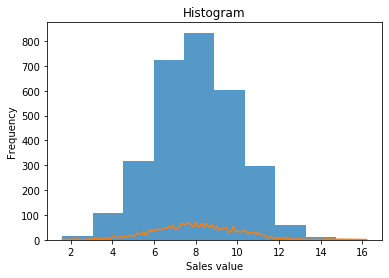

In [7]:
# For continuous data
ax = df.sales_value.plot.hist(alpha = 0.75)
df.groupby('sales_value')['sales_value'].count().plot()
ax.set(xlabel = 'Sales value', title = 'Histogram');

### Q-Q plot
In statistics, a Q-Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other.  

If the two distributions being compared are similar, the points in the Q-Q plot will approximately lie on the line y = x. If the distributions are linearly related, the points in the Q-Q plot will approximately lie on a line, but not necessarily on the line y = x. Q-Q plots can also be used as a graphical means of estimating parameters in a location-scale family of distributions.  

A Q-Q plot is used to compare the shapes of distributions, providing a graphical view of how properties such as location, scale, and skewness are similar or different in the two distributions.  

Below is a Q-Q plot of the sales data with a normal distribution  

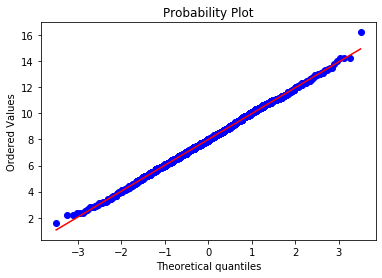

In [8]:
from scipy import stats
stats.probplot(df.sales_value, plot=sns.mpl.pyplot);

rom the above plot, it is clear that the distribution is normal.  

### Bar chart
Whereas the above plots are applicable for continuous data, a simple bar chart can help us with categorical data.  

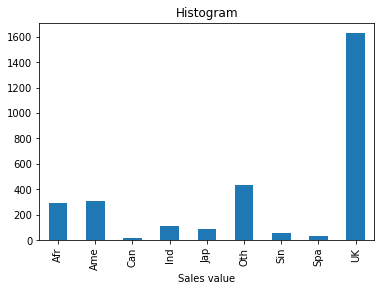

In [9]:
df.groupby('region')['region'].count().plot.bar().set(xlabel = 'Sales value', title = 'Histogram');

## Combining the basics
The below code will do the following for all the columns in the dataset:  
1. For continuous data, it will plot the scatter plot, box plot, histogram and q-q plot with normal distribution  
2. For categorical data, it will plot the bar chart

In [10]:
def univariate_analysis(dataset):
    # For catogorical data
    for i in (dataset.select_dtypes(exclude=['int', 'int64', 'float', 'float64']).columns):
        dataset.groupby(i)[i].count().plot.bar()
        plt.show();
    
    # For continuous data
    ## Selecting the columns that are continuous
    for i in (dataset.select_dtypes(include=['int', 'int64', 'float', 'float64']).columns):
        # Index plot
        plt.subplot(221)
        plt.plot(dataset[i], 'o', color='black')
        plt.xlabel(i)
        
         # q-q plot
        plt.subplot(222)
        stats.probplot(dataset[i], plot=sns.mpl.pyplot)
        
        #Box chart
        plt.title(i)
        plt.subplot(223)
        ax = sns.boxplot(x = dataset[i])
        
        # Histogram
        plt.subplot(224)
        ax2 = dataset[i].plot.hist(alpha = 0.75)
        dataset.groupby(i)[i].count().plot()
        
        plt.show();

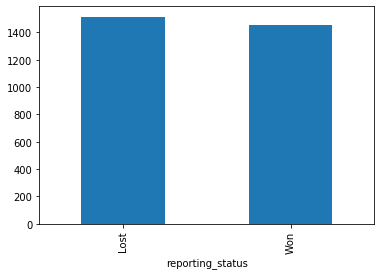

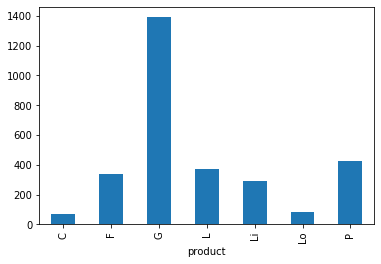

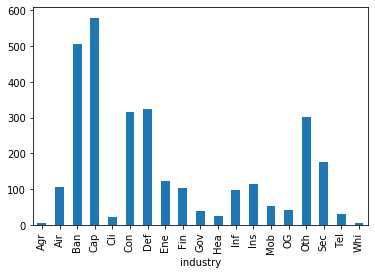

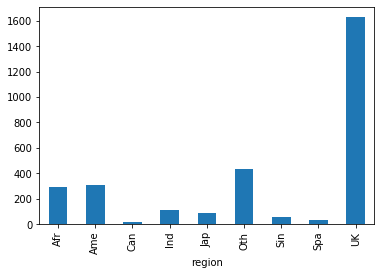

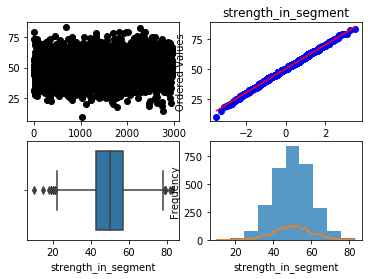

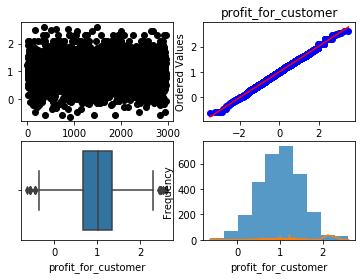

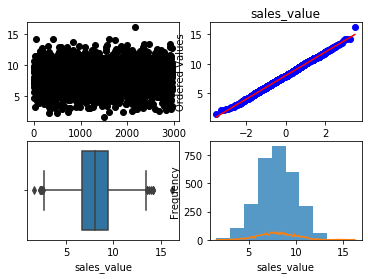

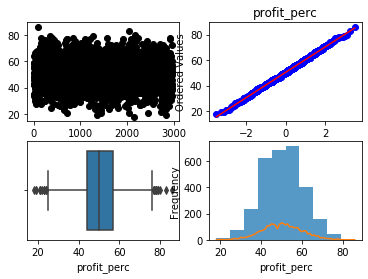

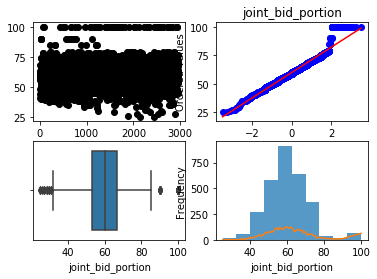

In [11]:
univariate_analysis(df)

To be continued with bi variate analysis